In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sp

This code is for cosmology, homework 3.
Code was written by Aysan Hemmati, 99170207


### some of the mathmatics needed to calculate uncertainties have been sent as an attachment.

In [6]:
file = r"C:/Users\AYSAN\Desktop/University/Cosmology/HW3\supernovae.csv"
from pandas import *
data = read_csv(file)
v = data['V[km/s]'].tolist()
d = data['D[Mpc]'].tolist()
dd = data['dD[Mpc]'].tolist()
print('velocities:' , v)
print('distances' , d)
print('distance errors:' , dd)


velocities: [9065, 12012, 15055, 16687, 9801, 4124, 13707, 7880, 22426, 7765, 4227, 30253, 18212, 5935, 10696, 13518, 17371, 12871, 5434, 23646, 26318, 18997, 21190, 15567, 15002, 8604, 14764, 5424, 7241, 8691, 4847, 10715, 14634, 6673, 9024, 10446]
distances [134.7, 158.9, 198.6, 238.9, 117.1, 56.0, 183.9, 121.5, 274.6, 102.1, 58.0, 467.0, 262.2, 88.6, 151.4, 202.5, 235.9, 176.8, 77.9, 309.5, 391.5, 280.1, 303.4, 236.1, 215.4, 119.7, 202.3, 71.8, 96.7, 127.8, 66.8, 149.9, 185.6, 82.4, 136.0, 132.7]
distance errors: [10.4, 14.9, 20.3, 19.8, 13.4, 3.3, 16.7, 14.1, 22.6, 4.7, 3.8, 51.6, 22.9, 9.3, 12.1, 19.7, 18.6, 15.9, 8.6, 28.5, 41.2, 23.9, 24.1, 27.6, 14.5, 7.8, 14.9, 8.1, 10.2, 11.9, 4.3, 11.3, 13.2, 9.4, 12.0, 16.7]


for y = ax+b fit: a,b = [ 0.01383969 -0.83672298]
H is :  72.25593939956718  b is :  60.458205294525925
uncertainties for a and b are :  1.4829235372503382 and 163.10843905201702


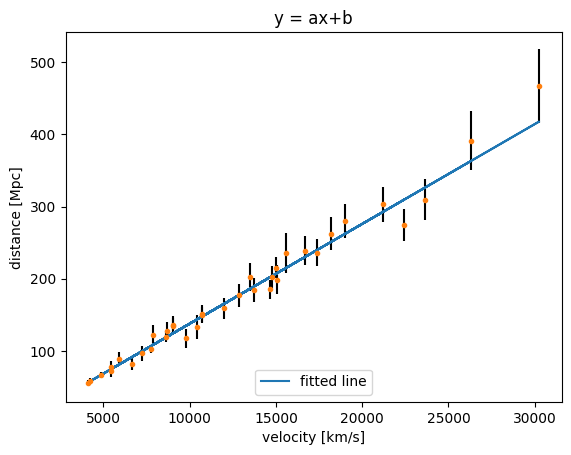

In [3]:
def line_function (a , x, b):
    return (a*x)+b

error = dd
x_data = np.asarray(v)
y_data = np.asarray(d)

popt, pcov = curve_fit(line_function, xdata = x_data, ydata = y_data, sigma = dd)
yfit = line_function(x_data, *popt)
print('for y = ax+b fit: a,b =', popt)
a = popt[0]
H = 1/popt[0]
b = popt[1]
B = -b/a
print("H is : ", H , " b is : " ,B)
Covariance_variances  = np.sqrt(np.diag(pcov))
unc_a  = Covariance_variances[0]*(H**2)
unc_b = Covariance_variances[1]*(H) 
print("uncertainties for a and b are : ", unc_a, "and" , unc_b)

plt.title("y = ax+b")
plt.ylabel("distance [Mpc]")
plt.xlabel("velocity [km/s]")

plt.errorbar(x_data, y_data,yerr = dd, fmt='none',ecolor = 'black',color='yellow') 
plt.plot(v, yfit, label='fitted line')
plt.plot(v, d, '.')
plt.legend(loc='lower center')
plt.show()

In [13]:
#penalty function:
khi2 = 0
for i in  range(0 , len(v)):
    x2 = ((d[i]  - line_function(a , v[i] , b))/dd[i])**2
    khi2 += x2
print(khi2)
print("reduced khi",khi2/(len(d)-2))

17.736214371294547
reduced khi 0.5216533638616043


# A)
# for y = ax+b:
## H =  72.25593939956718 +/- 1.4829235372503382
## b = 60.458205294525925 +/- 163.10843905201702
## X^2 = 17.499894643068565
## X^2(reduced) = 0.5216533638616043


H is :  72.74140861713109
uncertainty for a is :  0.7123267644603936


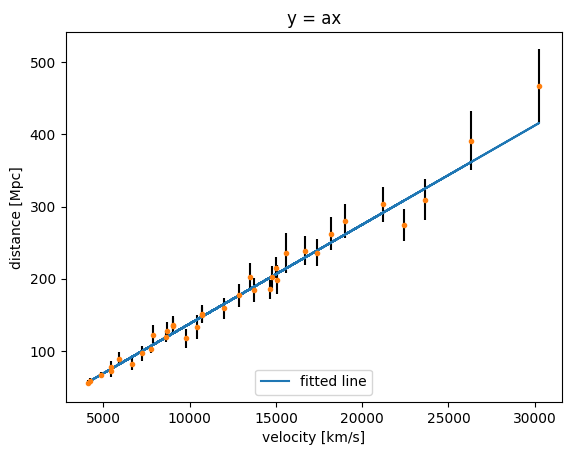

In [5]:
def line_function2 (a , x):
    return (a*x)

error = dd
x_data = np.asarray(v)
y_data = np.asarray(d)

popt, pcov = curve_fit(line_function2, xdata = x_data, ydata = y_data, sigma = dd)
yfit = line_function2(x_data, *popt)
#print('for y = ax fit: a =', popt)

a = popt[0]
H = 1/popt[0]
print("H is : ", H)

Covariance_variances  = np.sqrt(np.diag(pcov))
unc_a  = Covariance_variances[0]*(H**2)

print("uncertainty for a is : ", unc_a)

plt.title("y = ax")
plt.ylabel("distance [Mpc]")
plt.xlabel("velocity [km/s]")

plt.errorbar(x_data, y_data,yerr = dd, fmt='none',ecolor = 'black',color='yellow') 
plt.plot(v, yfit, label='fitted line')
plt.plot(v, d, '.')
plt.legend(loc='lower center')
plt.show()

In [15]:
#penalty function:
khi2_2 = 0
for i in  range(0 , len(v)):
    x2 = ((d[i]  - line_function2(a , v[i]))/dd[i])**2
    khi2_2 += x2
print("X^2 = ", khi2)
print("reduced khi",khi2_2/(len(d)-1))

X^2 =  17.736214371294547
reduced khi 0.5020174263922279


# B)
# for y = ax
## H = 72.74140861713109 +/- 0.7123267644603936
## X^2 = 17.570609923727975

degrees of freedom: 
The degree of freedom : n - m. where n is the number of observations and m is the number of fitted parameters.
## X^2(reduced) = 0.5020174263922279


# C) 

### how much is the difference?

|H(A) - H(B)| = 0.4855 


### why is there a difference? 

for objects farther than 5Mpc (according to the lectue notes, assuming our peculiar velocity is 400km/s), the expansion term (V = Hd) dominates. and since 
the closest supernova in our dataset is 56Mpc away, the better fit would be y = ax.

if our data containted closer supernovae, we would need to acount for the peculiar velocity term by adding a constant to the line function. Thus, y = ax+b is a better choice.

### which one is the better fit?
let's compare the two : 

- uncertainties : 

for y = ax+b , unc_H = 1.4829235372503382 and for y = ax, unc_H = 0.7123267644603936. thus y = ax is a better fit when it comes to uncertainties.

- chi-squared and reduced chi:

for y = ax+b, X^2 = 17.499894643068565 and X^2(reduced) = 0.5216533638616043.

for y = ax, X^2 = 17.570609923727975 and X^2(reduced) = 0.5020174263922279


both values are very close, but X^2(reduced) in combination to the uncertainty comparison is more helpful. 

The unusually hight uncertainty on the b value in y = ax+b in addition to resons listed above, help us get to the conclusion that **y = ax is the better fit.**



# D) 

### velocity in respect to distance plots and distance with respect to velocity plots: 

distance with respect to velocity plots where shown above. 


velocity in respect to distance plots are shown below:

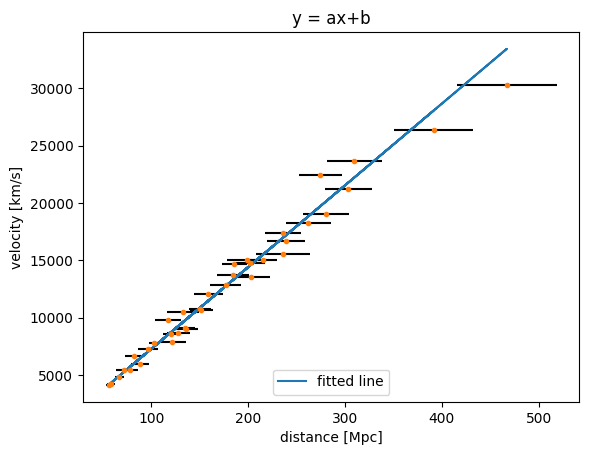

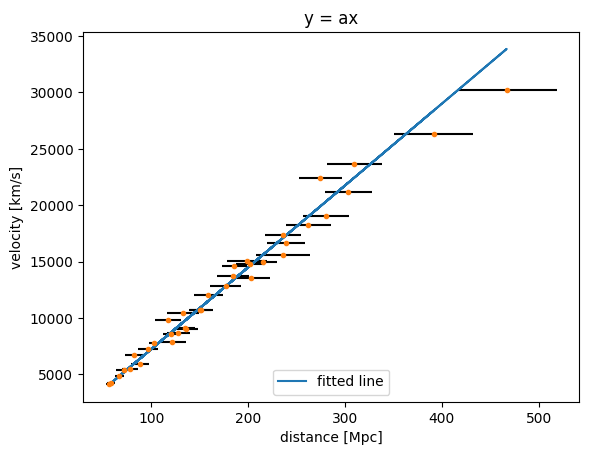

In [25]:

popt, pcov = curve_fit(line_function, xdata = x_data, ydata = y_data, sigma = dd)
yfit = line_function(x_data, *popt)

plt.title("y = ax+b")
plt.xlabel("distance [Mpc]")
plt.ylabel("velocity [km/s]")

plt.errorbar(x_data, y_data,xerr = dd, fmt='none',ecolor = 'black',color='yellow') 
plt.plot(d, yfit, label='fitted line')
plt.plot(d, v, '.')
plt.legend(loc='lower center')
plt.show()

popt, pcov = curve_fit(line_function2, xdata = x_data, ydata = y_data, sigma = dd)
yfit = line_function2(x_data, *popt)


plt.title("y = ax")
plt.xlabel("distance [Mpc]")
plt.ylabel("velocity [km/s]")

plt.errorbar(x_data, y_data,xerr = dd, fmt='none',ecolor = 'black',color='yellow') 
plt.plot(d, yfit, label='fitted line')
plt.plot(d, v, '.')
plt.legend(loc='lower center')
plt.show()